In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)

RANDOM_STATE = 42

wine = load_wine(as_frame=True)

X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

df = wine.frame.copy()

print("Shape of data:", df.shape)
print("Feature columns:", feature_names)
print("Target names:", target_names)
df.head()


Shape of data: (178, 14)
Feature columns: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names: ['class_0' 'class_1' 'class_2']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [2]:
print("Dataset info:")
print(df.info())

print("\nSummary statistics:")
df.describe().T


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    floa

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


Class distribution:
 class_0    59
class_1    71
class_2    48
Name: count, dtype: int64


C:\Users\mcw\AppData\Local\Temp\ipykernel_34536\2665403732.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['target'].map(dict(enumerate(target_names))), palette="Set2")


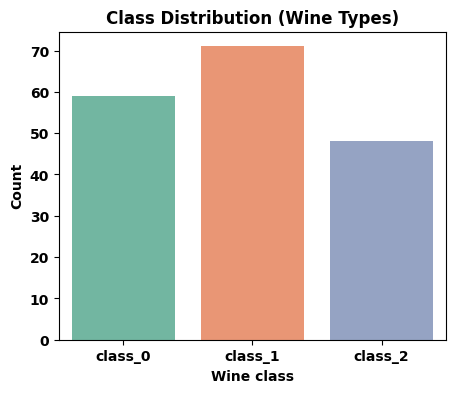

In [3]:
# Class distribution
class_counts = df['target'].value_counts().sort_index()
class_counts.index = target_names  # map indexes to class names
print("Class distribution:\n", class_counts)

plt.figure(figsize=(5, 4))
sns.countplot(x=df['target'].map(dict(enumerate(target_names))), palette="Set2")
plt.title("Class Distribution (Wine Types)")
plt.xlabel("Wine class")
plt.ylabel("Count")
plt.show()


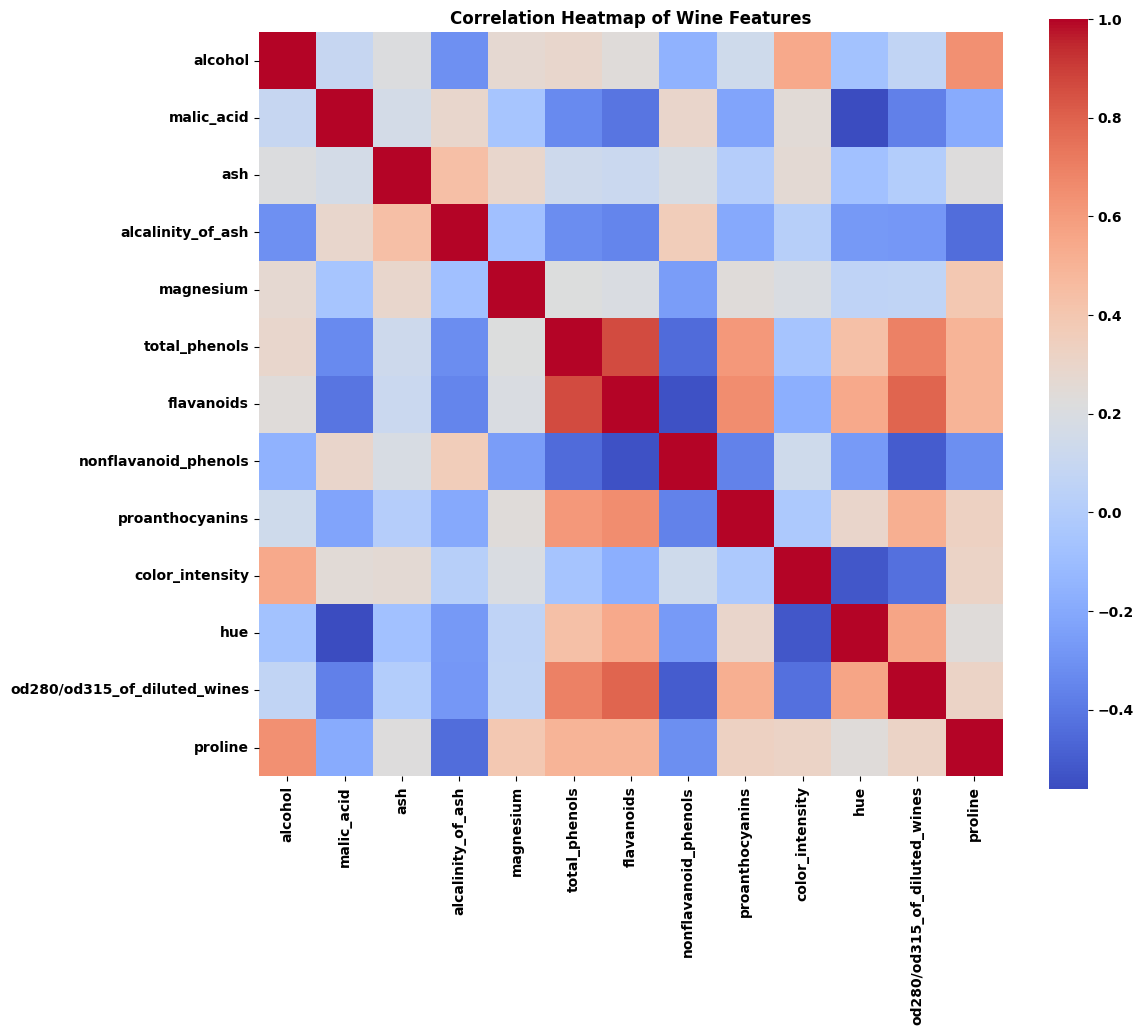

In [4]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = df[feature_names].corr()
sns.heatmap(
    corr,
    cmap="coolwarm",
    square=True,
    cbar=True,
)
plt.title("Correlation Heatmap of Wine Features")
plt.show()


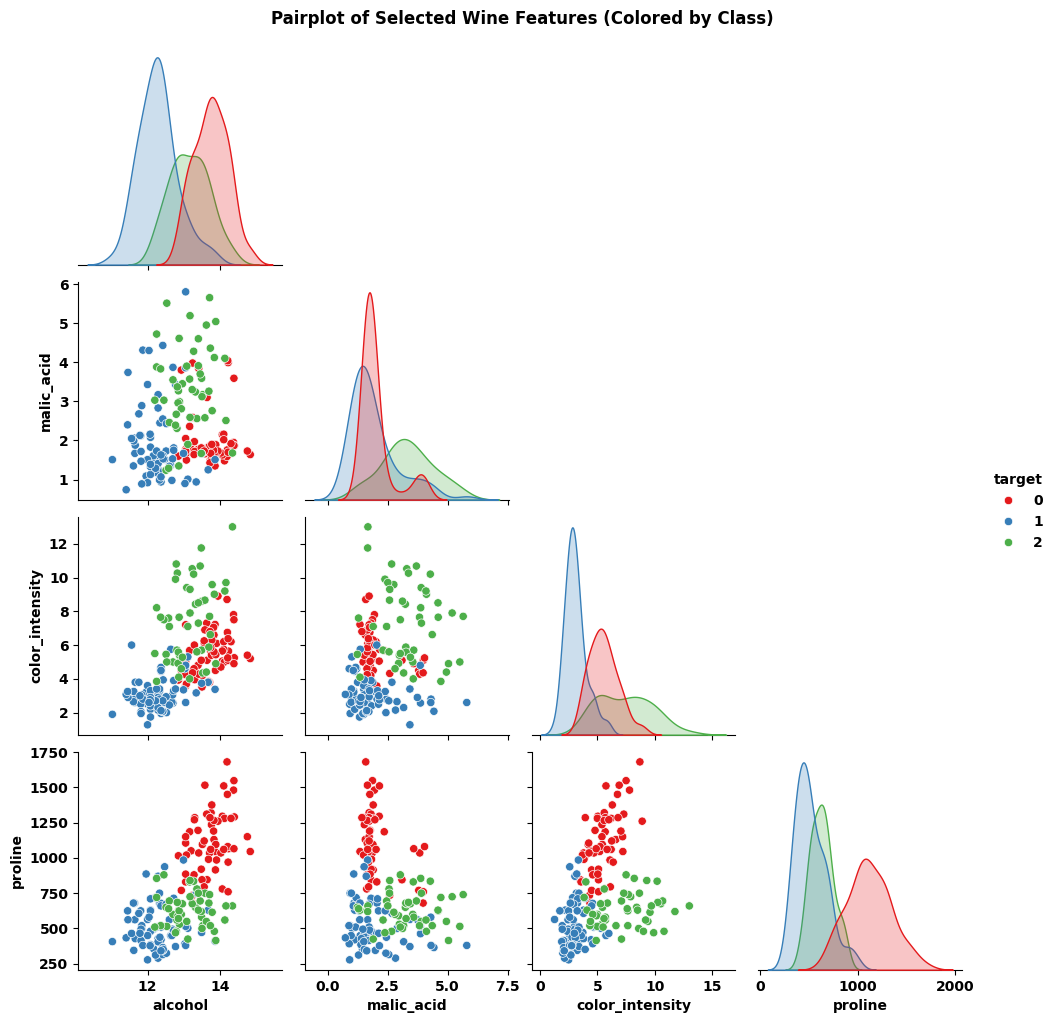

In [5]:
# Pairplot on a few important features to keep it readable
pairplot_features = [
    "alcohol",
    "malic_acid",
    "color_intensity",
    "proline",
    "target",
]

sns.pairplot(
    df[pairplot_features],
    hue="target",
    diag_kind="kde",
    corner=True,
    palette="Set1",
)
plt.suptitle("Pairplot of Selected Wine Features (Colored by Class)", y=1.02)
plt.show()


In [6]:
X = df[feature_names]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y,
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train shape: (142, 13)
Test shape: (36, 13)


In [7]:
baseline_svm = SVC(
    kernel="rbf",
    random_state=RANDOM_STATE
)

baseline_svm.fit(X_train_scaled, y_train)

y_pred_baseline = baseline_svm.predict(X_test_scaled)

baseline_acc = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline SVM Accuracy (RBF): {baseline_acc:.4f}")

print("\nClassification Report (Baseline SVM):")
print(classification_report(y_test, y_pred_baseline, target_names=target_names))


Baseline SVM Accuracy (RBF): 0.9722

Classification Report (Baseline SVM):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



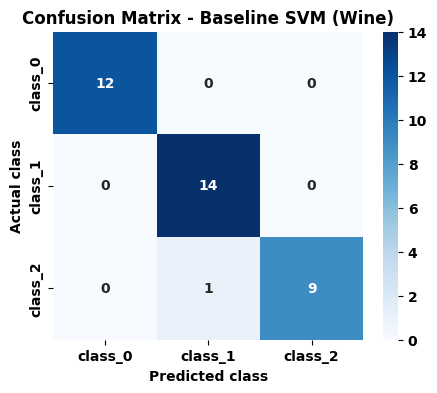

In [8]:
# Confusion matrix for baseline model
cm_baseline = confusion_matrix(y_test, y_pred_baseline)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_baseline,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=target_names,
    yticklabels=target_names,
)
plt.title("Confusion Matrix - Baseline SVM (Wine)")
plt.ylabel("Actual class")
plt.xlabel("Predicted class")
plt.show()


In [9]:
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto", 0.01, 0.001],
    "kernel": ["rbf", "poly"]
}

svm_model = SVC(random_state=RANDOM_STATE)

grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy: 0.9862068965517242


In [10]:
best_svm = grid_search.best_estimator_

y_pred_best = best_svm.predict(X_test_scaled)

best_acc = accuracy_score(y_test, y_pred_best)
print(f"Test Accuracy (Best SVM): {best_acc:.4f}")

print("\nClassification Report (Best SVM):")
print(classification_report(y_test, y_pred_best, target_names=target_names))


Test Accuracy (Best SVM): 0.9722

Classification Report (Best SVM):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



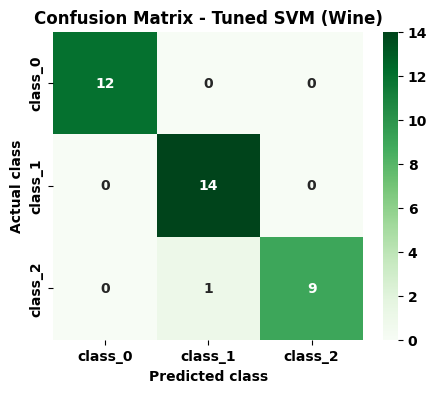

In [11]:
# Confusion matrix for tuned model
cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_best,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=target_names,
    yticklabels=target_names,
)
plt.title("Confusion Matrix - Tuned SVM (Wine)")
plt.ylabel("Actual class")
plt.xlabel("Predicted class")
plt.show()


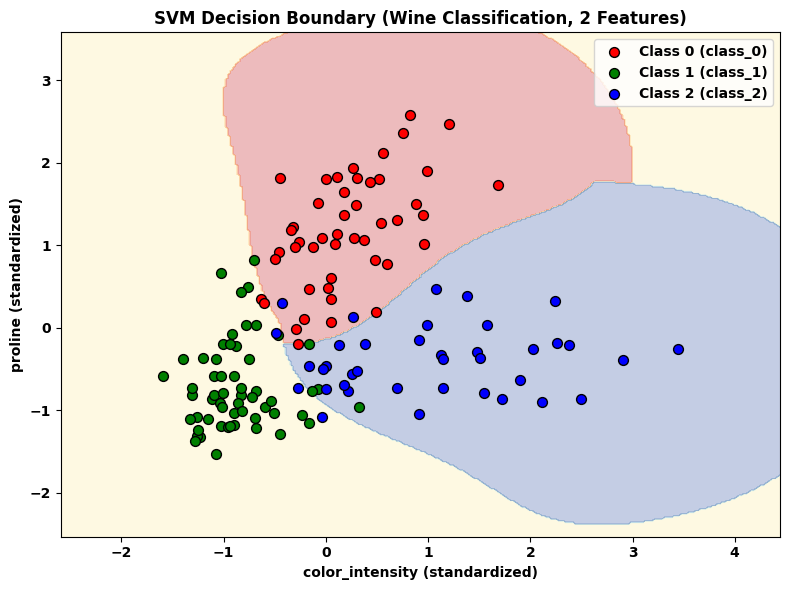

In [12]:
feature_x = "color_intensity"
feature_y = "proline"

X_vis = df[[feature_x, feature_y]].values
y_vis = df["target"].values

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis,
    y_vis,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y_vis,
)

scaler_vis = StandardScaler()
X_train_vis_scaled = scaler_vis.fit_transform(X_train_vis)
X_test_vis_scaled = scaler_vis.transform(X_test_vis)

svm_vis = SVC(kernel="rbf", C=10.0, gamma="scale", random_state=RANDOM_STATE)
svm_vis.fit(X_train_vis_scaled, y_train_vis)

x_min, x_max = X_train_vis_scaled[:, 0].min() - 1, X_train_vis_scaled[:, 0].max() + 1
y_min, y_max = X_train_vis_scaled[:, 1].min() - 1, X_train_vis_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="RdYlBu")

colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    mask = y_train_vis == i
    plt.scatter(
        X_train_vis_scaled[mask, 0],
        X_train_vis_scaled[mask, 1],
        c=color,
        label=f"Class {i} ({target_names[i]})",
        edgecolor="k",
        s=50
    )

plt.xlabel(f"{feature_x} (standardized)")
plt.ylabel(f"{feature_y} (standardized)")
plt.title("SVM Decision Boundary (Wine Classification, 2 Features)")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


In [14]:
test_samples = [
    # Sample 1: Typical Class 0 wine
    [13.20, 1.78, 2.14, 11.2, 100, 2.65, 2.76, 0.26, 1.28, 0.47, 1.1, 3.16, 770],

    # Sample 2: Typical Class 1 wine
    [12.80, 2.10, 1.95, 18.5, 105, 2.85, 2.95, 0.29, 1.35, 0.52, 1.15, 3.20, 820],

    # Sample 3: Typical Class 2 wine (high proline)
    [14.10, 2.30, 2.70, 24.5, 110, 2.87, 2.40, 0.26, 1.22, 0.45, 1.25, 2.95, 1450],
]

print("Testing 3 wine samples:")
print("Features:", ", ".join([name[:12] for name in feature_names]))
print()

test_df = pd.DataFrame(test_samples, columns=feature_names)
test_scaled = scaler.transform(test_df)

predictions = best_svm.predict(test_scaled)

for i, (sample, pred) in enumerate(zip(test_samples, predictions)):
    print(f"Sample {i+1}:")
    print(f"Input: [{', '.join([f'{x:.1f}' for x in sample[:6]])}...]")
    print(f"Predicted: {target_names[pred]} (Class {pred})")
    print()


Testing 3 wine samples:
Features: alcohol, malic_acid, ash, alcalinity_o, magnesium, total_phenol, flavanoids, nonflavanoid, proanthocyan, color_intens, hue, od280/od315_, proline

Sample 1:
Input: [13.2, 1.8, 2.1, 11.2, 100.0, 2.6...]
Predicted: class_0 (Class 0)

Sample 2:
Input: [12.8, 2.1, 1.9, 18.5, 105.0, 2.9...]
Predicted: class_1 (Class 1)

Sample 3:
Input: [14.1, 2.3, 2.7, 24.5, 110.0, 2.9...]
Predicted: class_0 (Class 0)

